# Сборный проект

**Описание проекта**
- Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
- Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Шаг 1.Открываем файл и изучаем данные**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
try:
    data = pd.read_csv('/Users/pashc/Downloads/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
data.duplicated().sum()

0

**Вывод**

Всего строк в датасете - 1675, таким образом, можно увидеть что в следующих столбцах есть пропущенные значения:
Year_of_Release, Critic_Score, User_Score, Rating
Также Year_of_Release нужно превести к формату int, а User_Score - float.
Более того, явные дубликаты не обнаружены

**Шаг 2. Подготовьте данные**

Приведем названия столбцов к нижнему регистру

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Преобразуем данные в нужные типы

In [ ]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
#заменяем значение nan на without - т.е нет рейтинга
data['rating'] = data['rating'].fillna('without')

In [ ]:
#смотрим, почему тип object
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tbd' - это To Be Decided или To Be Determined(будет определено). То есть это тоже самое что NAN, поэтому можно заменить tbd на nan

In [ ]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float')

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Пропуски в данных не повлияют на результаты исследования, поээтому оставим так

Проверям изменения

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Суммарные продажи во всех регионах


In [ ]:
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [ ]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,without,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,without,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,without,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,without,0.01


Вывод: Были разобраны пропуски в данных, было принято решение не удалять пропуски, поскольк это может повлиять на анализ данных. Также были приведены данные к нужному типу данных и создан новый столбец - общие продажи(total_sales)

**Шаг 3. Исследовательский анализ данных**

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

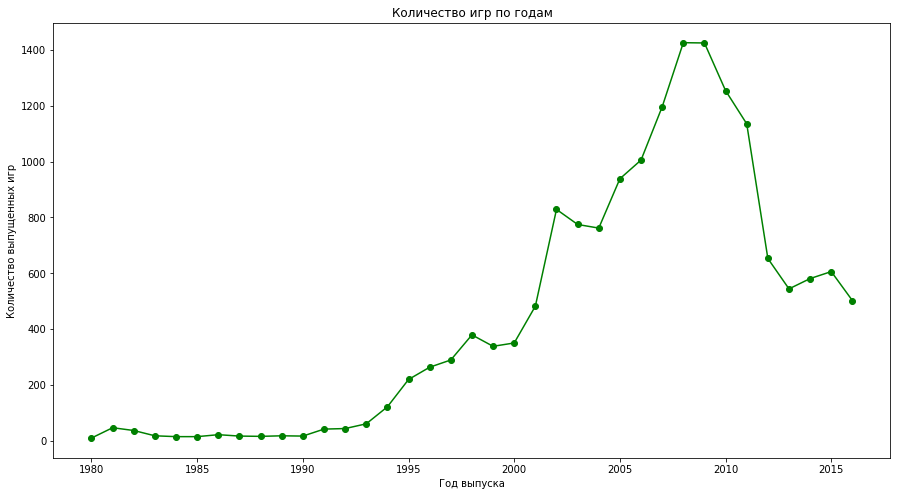

In [ ]:
data.groupby('year_of_release')['name'].count().plot(x = 'year_of_release', style = "-og",figsize=(15,8))
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show()

In [ ]:
grouped_by_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
grouped_by_years.columns = ['Количество выпущенных игр']
grouped_by_years

,Количество выпущенных игр
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


**Вывод**

Исходя из графика и сводной таблицы, можно сделать вывод о том, что с 1980 по 1994 игры выпускались в малом количестве- эти данные могут навредить анализу, затем наблюдается рост вплоть до 2008 - в этом году выпущено больше всего игр. После этого года выден спад по выпуску игр.


**Посмотрите, как менялись продажи по платформам**

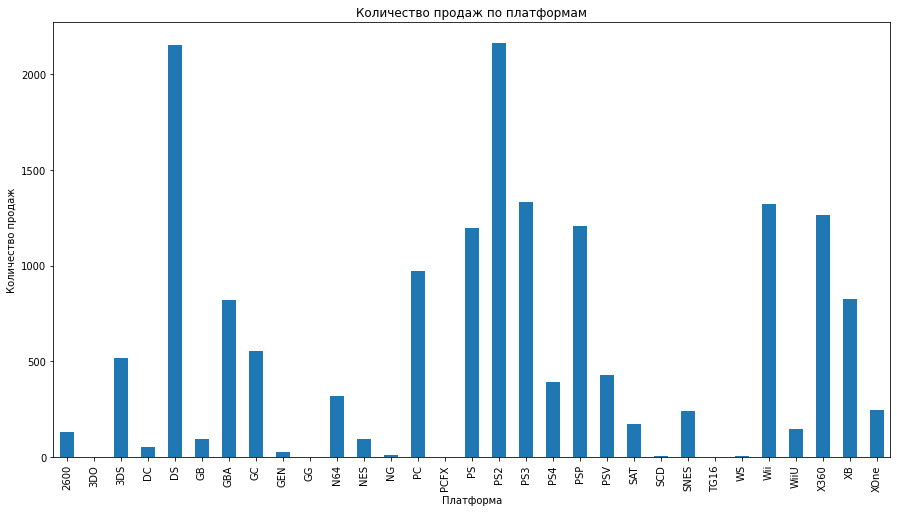

In [ ]:
#Посмотрим количесво продаж повсем платформам
data.groupby('platform')['total_sales'].count().plot(kind='bar',figsize=(15,8))
plt.title("Количество продаж по платформам")
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")
plt.show()

Выбираем топ платформ по количеству продаж

In [ ]:
top_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
top_platforms = top_platforms.head(6).reset_index()
top_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86


Мы видим по сводной таблице, что в наиболее продаваемыми платформами являются PS2, X360, PS3, Wii, DS, PS

In [ ]:
#создаем список имен топовых платформ
platforms_dict = top_platforms['platform'].unique()
platforms_dict

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype=object)

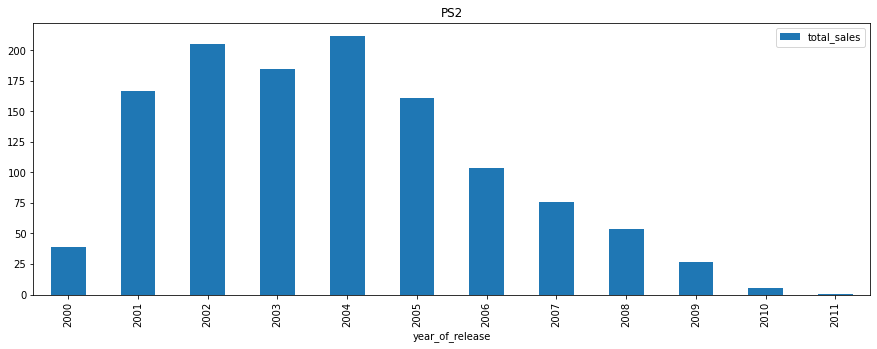

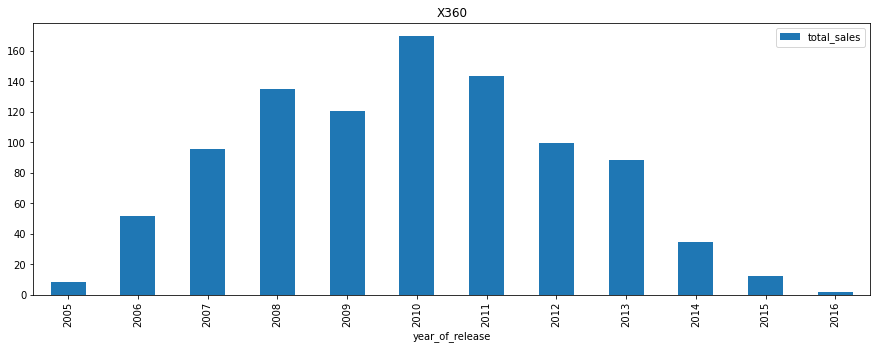

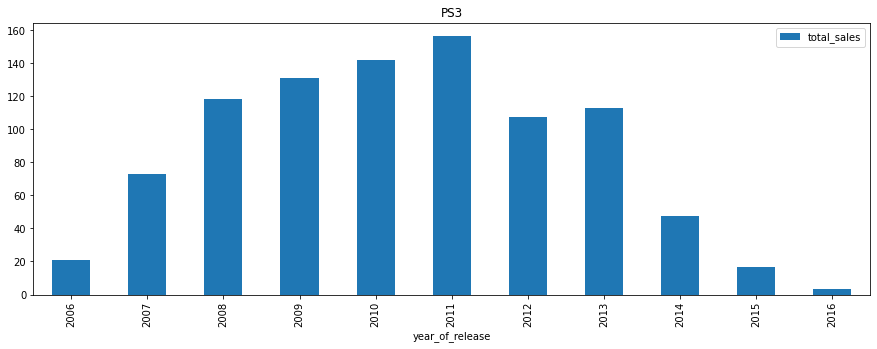

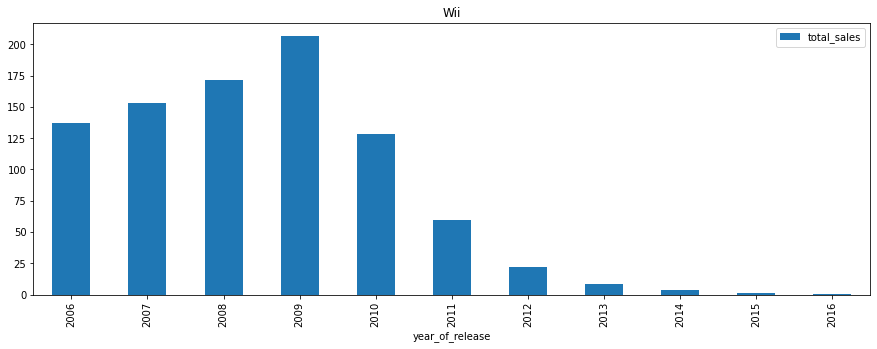

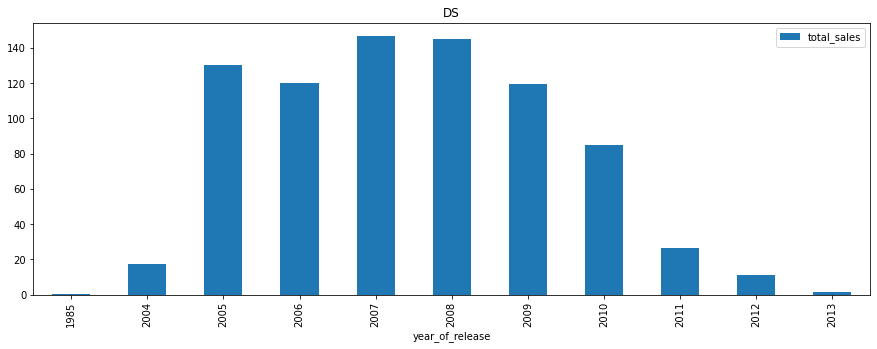

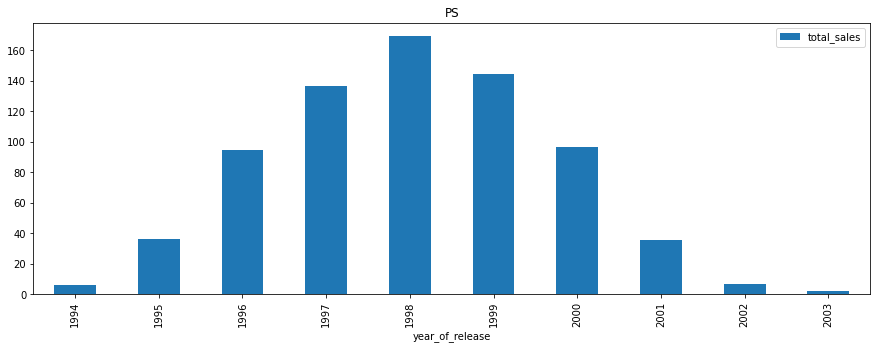

In [ ]:
#создаем графики распределения продаж платформ по годам
for i in platforms_dict:
    data[data['platform'] == i].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
    plt.title(i)

За какой характерный срок появляются новые и исчезают старые платформы?

Платформы живут примерно 10-12 лет, а пик их продаж приходится на 4-6 года, после чего продажи начинают падать

**Актуальные данные**

Чтобы спрогнозировать на 2017 год, необходимо понимать, что пик приходился на 2008-2009 год, однако после этого продажи упали и в последние 5 лет не превышают 700, поэтому корректно будет взять данные с 2012 года

In [ ]:
#отбираем акутальные данные
actual_data = data[data['year_of_release'] > 2012]
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,without,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,without,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01


**Какие платформы лидируют по продажам, растут или падают?**

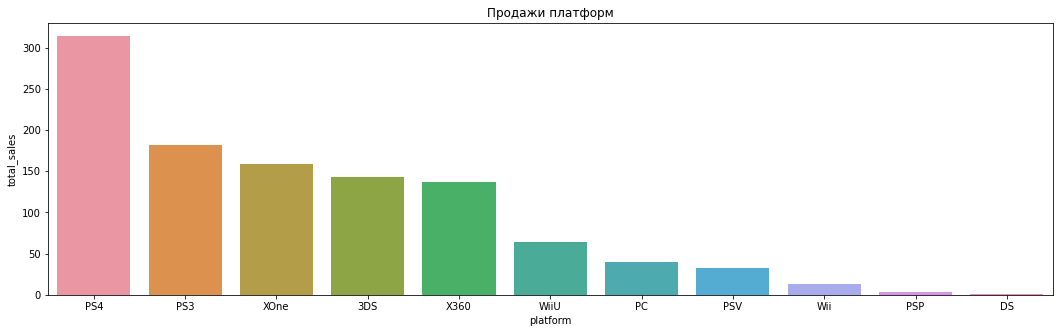

In [ ]:
#потенциально-прибыльные платформы
actual_2016 = actual_data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(18, 5))
sns.barplot(data = actual_2016, x='platform', y='total_sales')
plt.title('Продажи платформ')
plt.show()

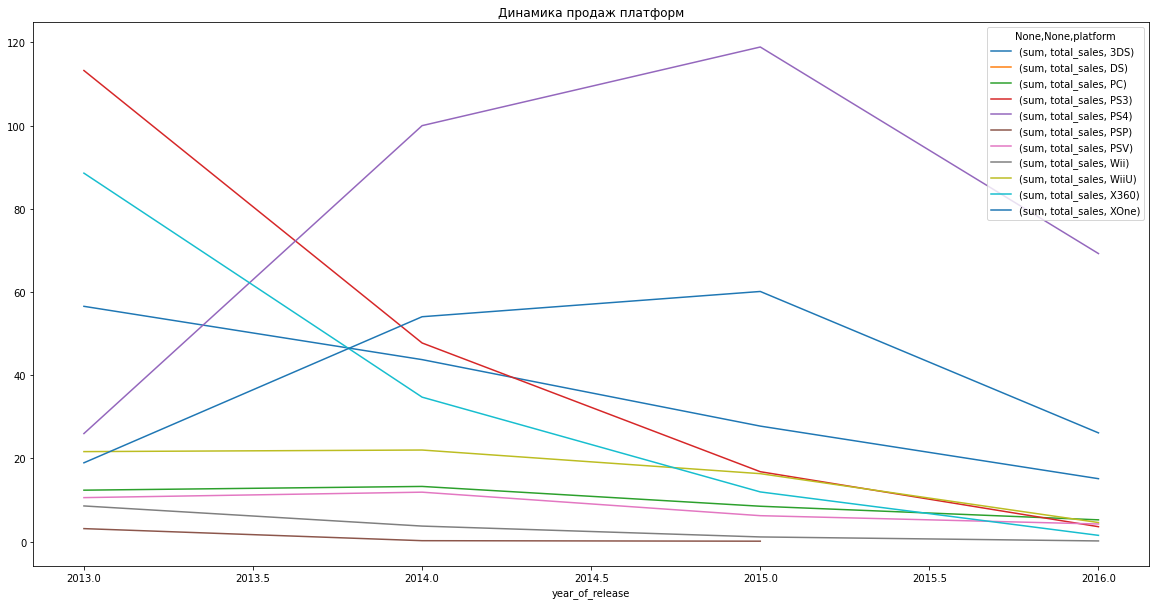

In [ ]:
top_platforms_actual =actual_data.pivot_table(index = ['year_of_release'], columns = ['platform'], values = ['total_sales'],aggfunc =  ['sum'])
top_platforms_actual.plot(figsize = (20,10))
plt.title('Динамика продаж платформ')
plt.show()

Из графика мы видим, что прибыльными платформами будут являться ps4, xone, 3ds и PC. Они демонстировали рост в особенности ps4 и 3ds, однако продажи начали падать после 2015 года.

**«Ящик с усами» по глобальным продажам игр в разбивке по платформам.**

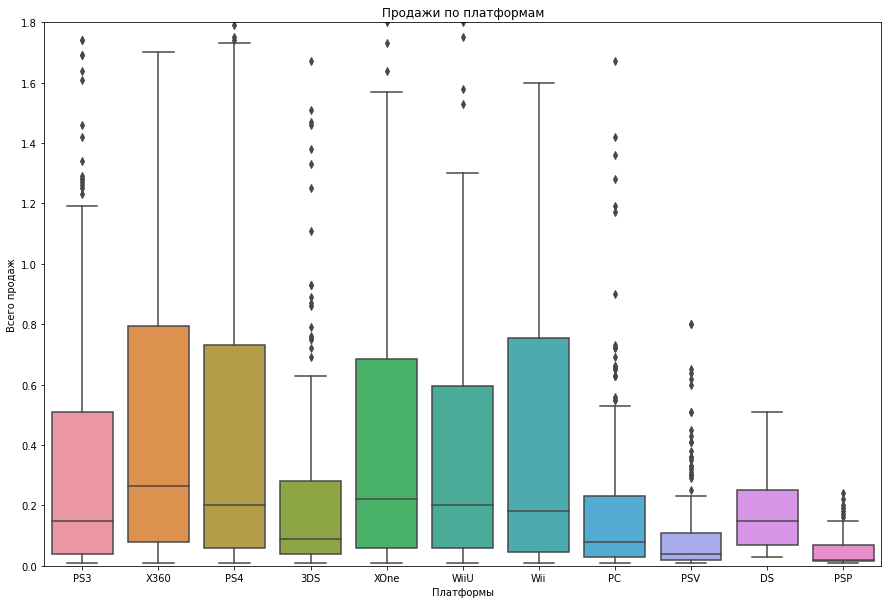

In [ ]:
plt.figure(figsize=(15,10))
(sns.boxplot(data = actual_data, y = 'total_sales', x = 'platform').set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Всего продаж', ylim = (0,1.8)))
plt.show()

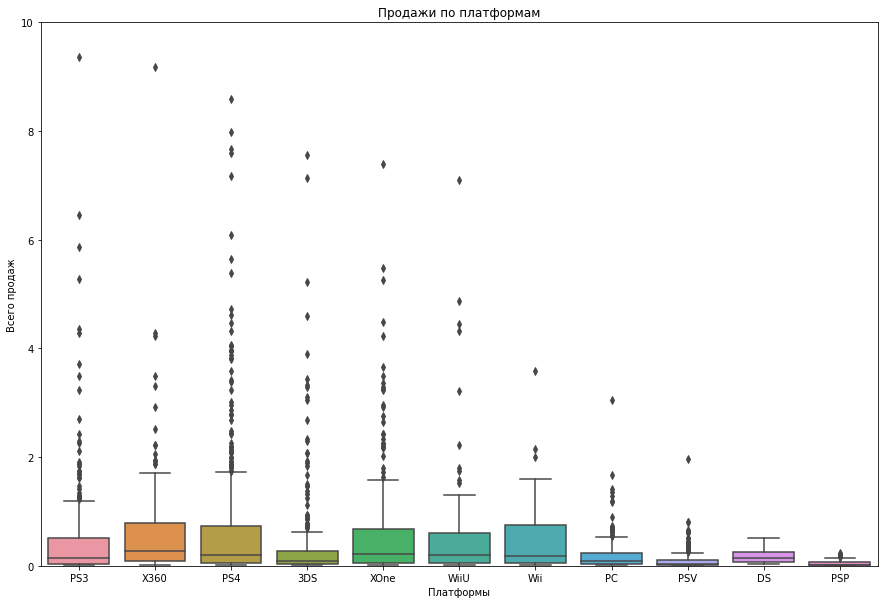

In [ ]:
plt.figure(figsize=(15,10))
(sns.boxplot(data = actual_data, y = 'total_sales', x = 'platform').set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Всего продаж', ylim = (0,10)))
plt.show()

Исходя из пердставленной диаграммы, мы видим, что медиана везде стремится к нижнему квартилю, что означает не высокий уровень средних продаж. Максимальные продажи больше 1,5 м наблюдаются у платформ x360, PS4, XOne, WII. Несмотря на это, во многих платформах наблюдается много выбросов, свидетельствующих о крупных суммах.

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

In [ ]:
xone = actual_data.query('platform == "XOne"')
xone = xone.sort_values('user_score',ascending = False)

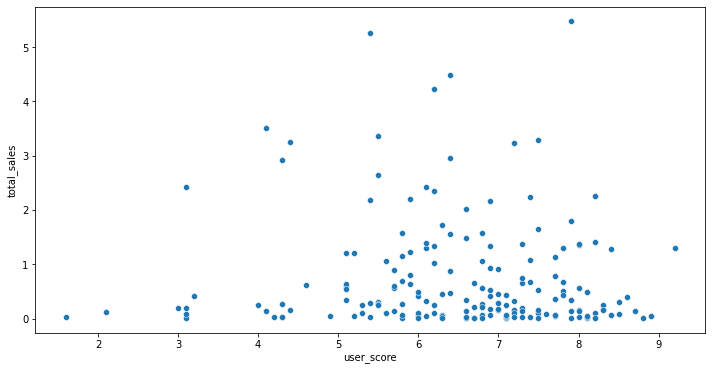

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x ='user_score', y ='total_sales', data = xone)
plt.show()

In [ ]:
#корреляцция между отзывами и продажами
xone['user_score'].corr(xone['total_sales'])

-0.06892505328279423

Коэффициент коррелции очень близок к нулю, поэтому влияния на продажи оценки пользователей

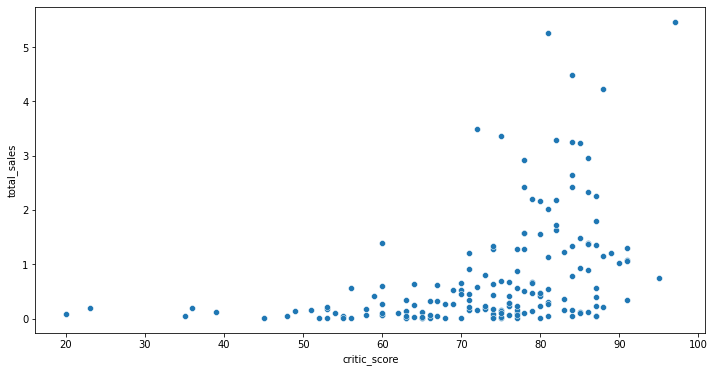

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'critic_score', y = 'total_sales', data = xone)
plt.show()

In [ ]:
#корреляцция между отзывами и продажами
xone['critic_score'].corr(xone['total_sales'])

0.4169983280084016

Здесь мы видим, что коэффициент уже больше, но связь все равно не очень сильная, тем не менее существует слабое влияние на продажи со стороны отзывово критиков.

In [ ]:
ps4 = actual_data.query('platform == "PS4"')
ps4 = ps4.sort_values('user_score',ascending = False)
print(ps4['user_score'].corr(ps4['total_sales']))
print(ps4['critic_score'].corr(ps4['total_sales']))

-0.031957110204556424
0.40656790206178134


In [ ]:
x360 = actual_data.query('platform == "X360"')
x360 = x360.sort_values('user_score',ascending = False)
print(x360['user_score'].corr(x360['total_sales']))
print(x360['critic_score'].corr(x360['total_sales']))

-0.011742185147181356
0.3503445460228664


In [ ]:
ps3 = actual_data.query('platform == "PS3"')
ps3 = ps3.sort_values('user_score',ascending = False)
print(ps3['user_score'].corr(ps3['total_sales']))
print(ps3['critic_score'].corr(ps3['total_sales']))

0.0023944027357566773
0.33428533933719184


Рассмотрев для сравнения другие платформы , мы наблюдаем такую же ситуацию, соответственно - прямой зависимости нет.

**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [ ]:
genre = actual_data.groupby('genre').agg({'name':'count'}).reset_index()
genre.sort_values(by='name', ascending=False)

,genre,name
0,Action,766
7,Role-Playing,292
1,Adventure,245
10,Sports,214
8,Shooter,187
3,Misc,155
6,Racing,85
2,Fighting,80
4,Platform,74
9,Simulation,62


Исходя из сводной таблицы распределения жанра игр, видим, что наиболее популярными играми являются action игры.

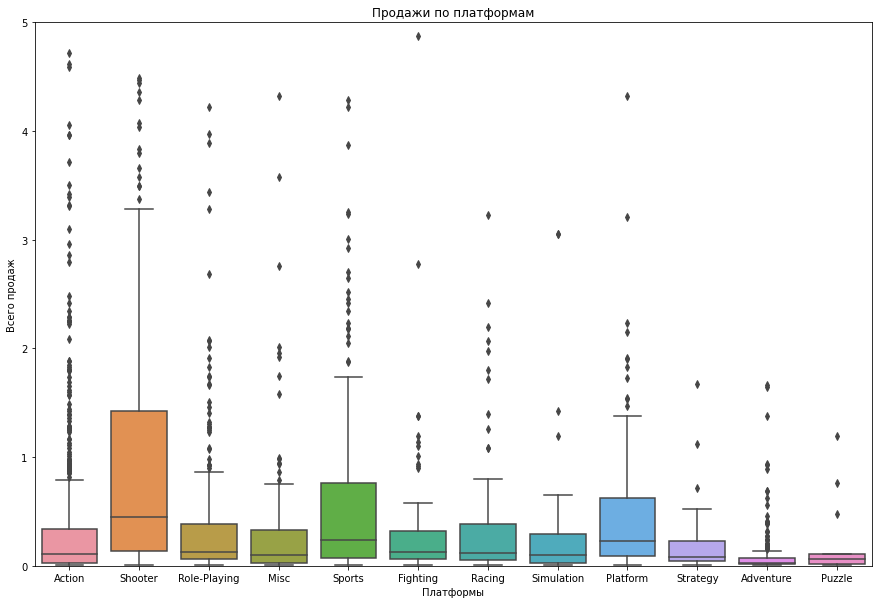

In [ ]:
plt.figure(figsize=(15,10))
(sns.boxplot(data = actual_data, y = 'total_sales', x = 'genre').set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Всего продаж', ylim = (0,5)))
plt.show()

Мы видим, что больше всего прибыльных игр, т.е выбросов больше всего у популярного жанра игр Action, что означает большую общую прибыль.
Также стоит отметить игры жанра shooter, где самая высокая медиана продаж.


**Портрет пользователя каждого региона**

Самые популярные платформы (топ-5)

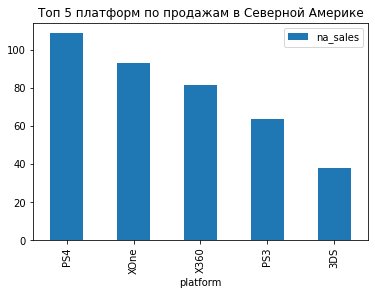

In [ ]:
actual_data.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 платформ по продажам в Северной Америке')
plt.show()

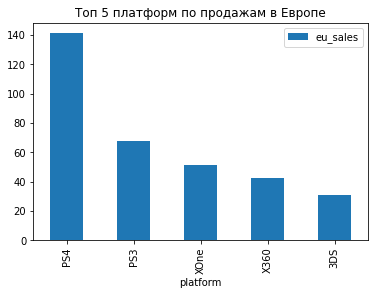

In [ ]:
actual_data.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 платформ по продажам в Европе')
plt.show()

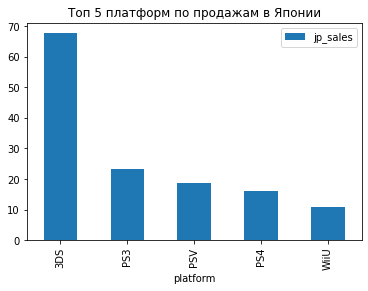

In [ ]:
actual_data.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 платформ по продажам в Японии')
plt.show()

Таким образом, мы видим, что наиболее популярными платформами являются PS4, XOne, X360, PS3

Самые популярные жанры (топ-5)

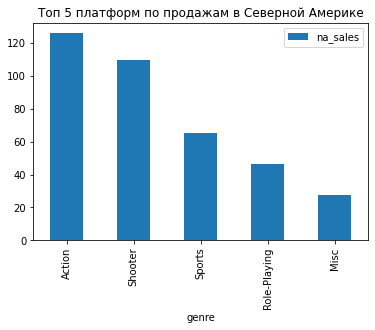

In [ ]:
actual_data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 платформ по продажам в Северной Америке')
plt.show()

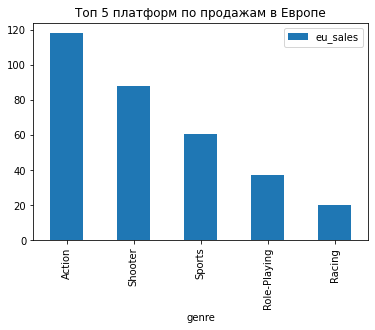

In [ ]:
actual_data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 платформ по продажам в Европе')
plt.show()

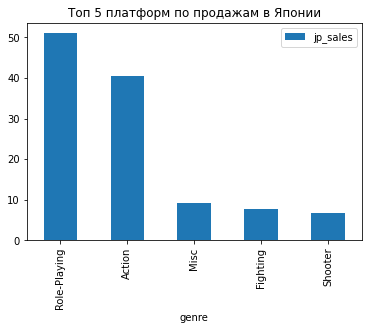

In [ ]:
actual_data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 платформ по продажам в Японии')
plt.show()

Мы видим, что только в Японии жанр Action уступает жанру Role-Playing, более того, популярными жанрами также являются shooter, sports, misc

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

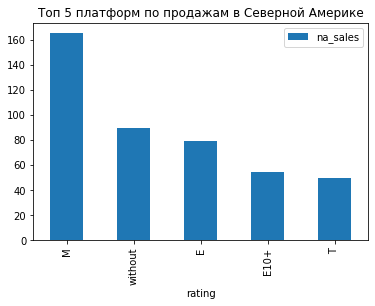

In [ ]:
actual_data.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 платформ по продажам в Северной Америке')
plt.show()

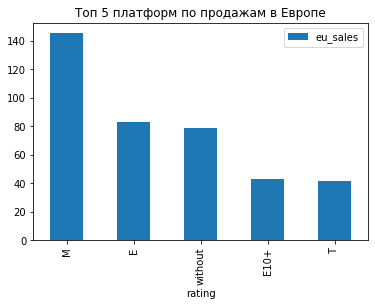

In [ ]:
actual_data.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 платформ по продажам в Европе')
plt.show()

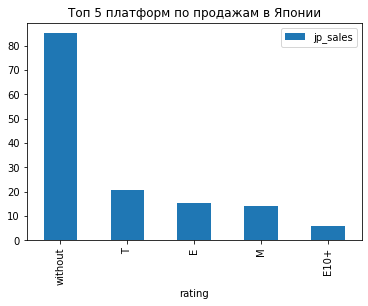

In [ ]:
actual_data.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 платформ по продажам в Японии')
plt.show()

Благодаря диаграммам можно отметить интересную ситуацию, где градация рейтингов одинаковая что в Северной Америки, что в Европе. На первом месте игры рейтинга для взрослых, на втором - для всех, на третьем месте игры для лиц старше 10 лет, и на последнем месте для подростков.
В Японии же лидирцют игры с рейтингом для подростков, а игры для взрослых находятся только на последнем месте.

**Проверка гипотез**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Необходимо определить нулевую и альтернативную гипотезу:

Н0: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый (по условию)

H1: Средний пользовательский рейтинг платформ Xbox One и PC различается (противоположное нулевой гипотезе)

критический уровень статистической значимости

In [ ]:
alpha = 0.05 # если p-value окажется меньше него - отвергнем гипотезу

In [ ]:
x_one = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)]['user_score']
pc = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]['user_score']
results = st.ttest_ind(x_one, pc)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Необходимо определить нулевую и альтернативную гипотезу:

Н0: Средний пользовательский рейтинг платформ Action и Sports одинаковый (по условию)

H1: Средний пользовательский рейтинг платформ Action и Sports различается (противоположное нулевой гипотезе)

In [ ]:
action = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)]['user_score']
sport = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)]['user_score']
results = st.ttest_ind(action, sport)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


### Общий вывод

**Шаг 1. Получение данных**

- Были получены данные о продажах компьютерных игр

In [ ]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,without,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,without,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,without,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,without,0.01


**Шаг 2. Подготовка данных**

Были обнаружены и изучены пропуски в данных. В столбце user_score было заменено tbd на nan, в столбце rating nan были заменены на without (нет рейтинга).
Также Year_of_Release было приведено в int, а User_Score - float.
Более того, явные дубликаты не были  обнаружены

**Шаг 3. Исследовательский анализ данных**

- Игры выпускались с 1985, но данная сфера не развивалась. Индустрия начала расти с 1995 года. Пиком по количеству выпущенных игр будет являться период с 2008 по 2009 год, после чего количество игр стало уменьшаться

In [ ]:
grouped_by_years

,Количество выпущенных игр
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


- На основе данных о количестве выпущенных игр был отобран актуальный датасет - с 2012 по 2016 год, для пронозирования , поскольку он отражает снижение количества игр после его пика

- Также были определены топ пять игр по продажам

In [ ]:
top_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86


- Платформы живут примерно 10-12 лет, а пик их продаж приходится на 4-6 года, после чего продажи начинают падать

- Прибыльными платформами являются ps4, xone, 3ds.

- Рассмотрев диаграммы рассеивания и корреляцию платформ, не было выявлено прямой зависимости между отзывами и продажами

- Самым популярным жанром является Action

In [ ]:
genre

,genre,name
0,Action,766
1,Adventure,245
2,Fighting,80
3,Misc,155
4,Platform,74
5,Puzzle,17
6,Racing,85
7,Role-Playing,292
8,Shooter,187
9,Simulation,62


**Шаг 4. Портрет пользователя каждого региона**

- У пользователей из Европы и Северной Америки похожие предпочтения, в Японии больше любят жанр игр Role-Playing

**Шаг 5. Проверка гипотез**

- Пользовательский рейтинг Xbox One и PC одинаков
- Средние пользовательские рейтинги жанров Action и Sports различаются

**Рекомендация магазину видеоигр**

- Необходимо сосредоточится на потенциально прибыльных платформах ps4, xone, 3ds и PC. Более того, если рассматривать жанры игр, то рекомендуется делать упор на игры в жанре Action, Role-Playing и Shooter